<a href="https://colab.research.google.com/github/tanvir-talha058/4-in-a-Row/blob/main/Task_for_Dokkho_Career_Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('/content/train.csv')
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop_duplicates(inplace=True)
display(df.isnull().sum())
display(df.info())

/tmp/ipython-input-3473603915.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3473603915.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [3]:
df['Age'] = df['Age'].astype(int)
bins = [0, 12, 18, 60, 100]
labels = ['Child', 'Teenager', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Fare'] = df['Fare'].clip(lower=lower_bound, upper=upper_bound)

display(df[['Age', 'AgeGroup', 'Fare']].head())
display(df.info())

,Age,AgeGroup,Fare
0,22,Adult,7.2500
1,38,Adult,65.6344
2,26,Adult,7.9250
3,35,Adult,53.1000
4,35,Adult,8.0500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    object  
 12  AgeGroup     891 non-null    category
dtypes: category(1), float64(1), int64(6), object(5)
memory usage: 84.7+ KB


None

'Descriptive Statistics:'

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.345679,0.523008,0.381594,24.046813
std,257.353842,0.486592,0.836071,13.028212,1.102743,0.806057,20.481625
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,65.634400


'Distribution of Passengers by Gender:'

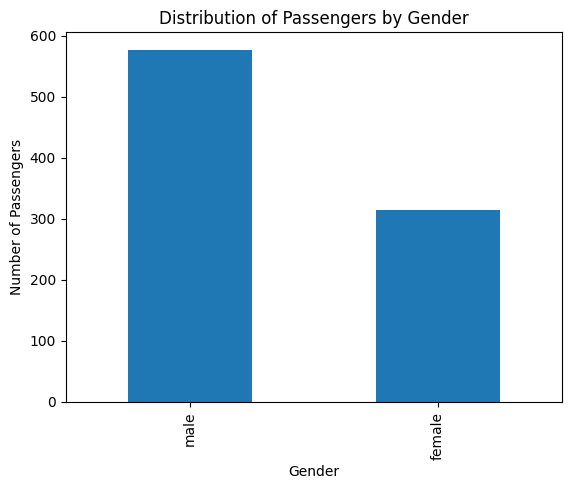

'Age Distribution:'

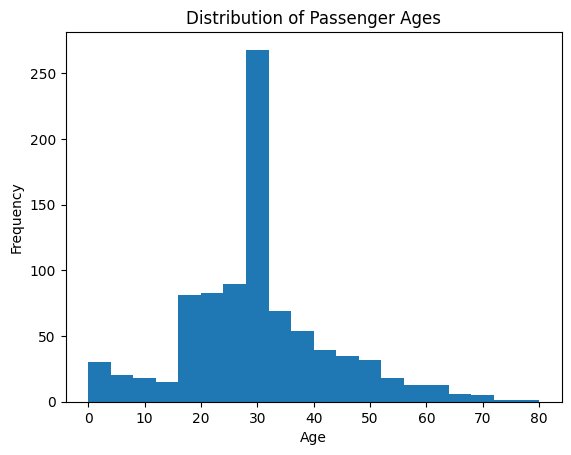

'Survival Rate by Gender and Class:'

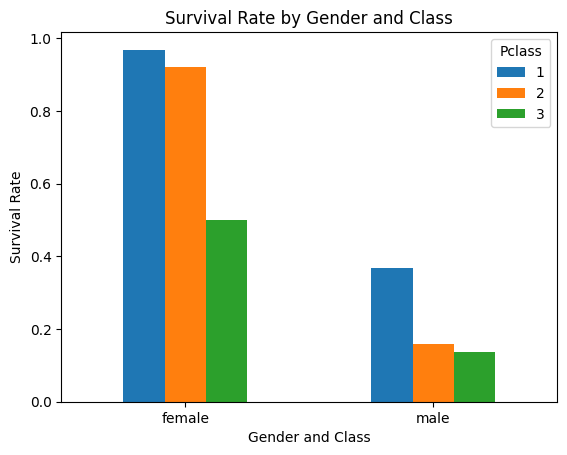

In [8]:
# 1. Display descriptive statistics of numerical columns
display("Descriptive Statistics:")
display(df.describe())

# 2. Generate a bar plot for distribution of passengers by 'Sex'
display("Distribution of Passengers by Gender:")
sex_counts = df['Sex'].value_counts()
sex_counts.plot(kind='bar')
plt.title('Distribution of Passengers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.show()

# 3. Create a histogram for the age distribution
display("Age Distribution:")
plt.hist(df['Age'], bins=20) # Using 20 bins for age distribution
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 4. Visualize the survival rate by gender and class
display("Survival Rate by Gender and Class:")
survival_rate_sex_class = df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()
survival_rate_sex_class.plot(kind='bar')
plt.title('Survival Rate by Gender and Class')
plt.xlabel('Gender and Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.legend(title='Pclass')
plt.show()

'Descriptive Statistics:'

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.345679,0.523008,0.381594,24.046813
std,257.353842,0.486592,0.836071,13.028212,1.102743,0.806057,20.481625
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,65.634400


'Distribution of Passengers by Gender:'

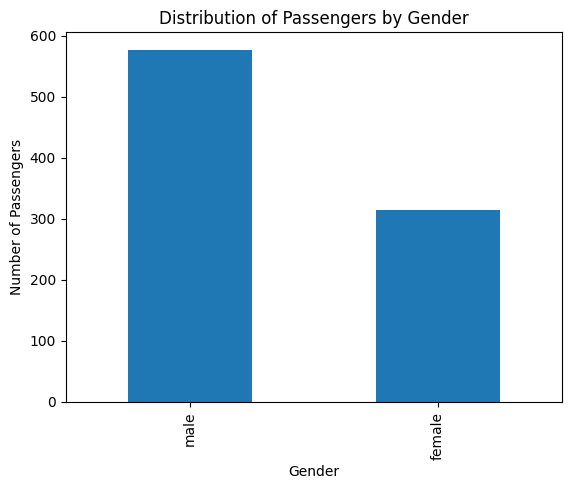

'Age Distribution:'

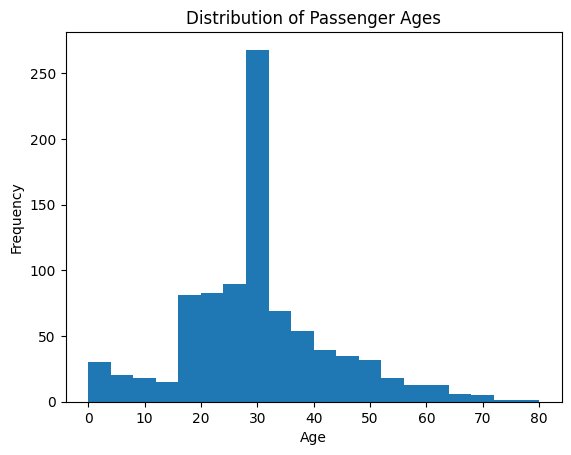

'Survival Rate by Gender and Class:'

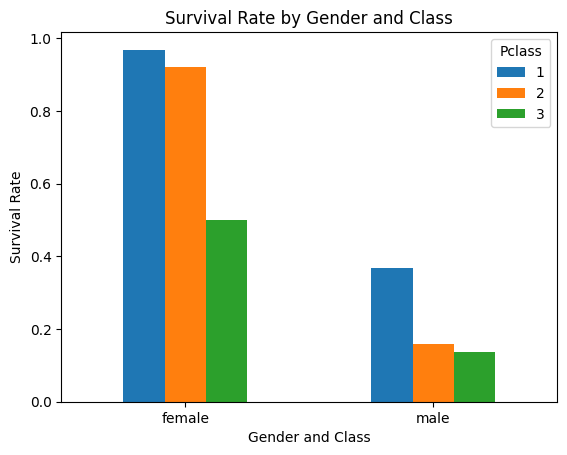

In [5]:
import matplotlib.pyplot as plt

# 1. Display descriptive statistics of numerical columns
display("Descriptive Statistics:")
display(df.describe())

# 2. Generate a bar plot for distribution of passengers by 'Sex'
display("Distribution of Passengers by Gender:")
sex_counts = df['Sex'].value_counts()
sex_counts.plot(kind='bar')
plt.title('Distribution of Passengers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.show()

# 3. Create a histogram for the age distribution
display("Age Distribution:")
plt.hist(df['Age'], bins=20) # Using 20 bins for age distribution
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 4. Visualize the survival rate by gender and class
display("Survival Rate by Gender and Class:")
survival_rate_sex_class = df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()
survival_rate_sex_class.plot(kind='bar')
plt.title('Survival Rate by Gender and Class')
plt.xlabel('Gender and Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.legend(title='Pclass')
plt.show()

In [6]:
from scipy.stats import ttest_ind

# Calculate mean, median, and mode for 'Fare'
fare_mean = df['Fare'].mean()
fare_median = df['Fare'].median()
fare_mode = df['Fare'].mode()[0] # mode() can return multiple values, take the first one

# Calculate mean, median, and mode for 'Age'
age_mean = df['Age'].mean()
age_median = df['Age'].median()
age_mode = df['Age'].mode()[0]

# Separate 'Survived' into two groups based on 'Sex'
survived_male = df[df['Sex'] == 'male']['Survived']
survived_female = df[df['Sex'] == 'female']['Survived']

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(survived_male, survived_female)

# Print the results
print(f"Fare - Mean: {fare_mean:.2f}, Median: {fare_median:.2f}, Mode: {fare_mode:.2f}")
print(f"Age - Mean: {age_mean:.2f}, Median: {age_median:.2f}, Mode: {age_mode:.2f}")
print(f"T-test results for survival rate by gender: T-statistic = {t_statistic:.2f}, P-value = {p_value:.4f}")

Fare - Mean: 24.05, Median: 14.45, Mode: 65.63
Age - Mean: 29.35, Median: 28.00, Mode: 28.00
T-test results for survival rate by gender: T-statistic = -19.30, P-value = 0.0000



### Data Analysis Key Findings

*   Missing values in the 'Age' column were filled with the median age, and missing values in the 'Embarked' column were filled with the mode.
*   No duplicate rows were found in the dataset.
*   The 'Age' column was successfully converted to an integer type.
*   A new categorical column 'AgeGroup' was created based on defined age bins.
*   Outliers in the 'Fare' column were handled using the IQR method by capping values at the calculated lower and upper bounds.
*   The mean fare was approximately \$24.05, the median fare was \$14.45, and the mode fare was \$65.63.
*   The mean age was approximately 29.35 years, the median age was 28.00 years, and the mode age was 28.00 years.
*   An independent samples t-test comparing survival rates between genders yielded a t-statistic of -19.30 and a p-value of 0.0000, indicating a statistically significant difference.

